In [2]:
"""
Syntax dibawah merupakan syntax untuk mengimport/memanggil library library yang akan
digunakan untuk mengolah citra yang ada, library-library yang digunakan seperti metplotlib.pyplot
(plt), cv2 (cv), numpy (np) dan math
"""
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import math

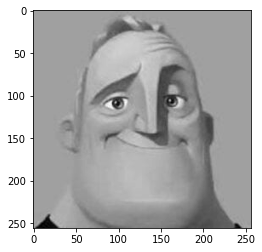

In [3]:
"""
Syntax dibawah merupakan insialisasi dari variabel image, yang mana merupakan
variabel yang digunakan untuk menyimpan citra yang akan diolah dengan menggunakan
method imread dari library matplotlib.pyplot (plt) yang dimana citranya diambil dari local komputer
dan menampilkannya dengan method imshow dari method yang sama
"""
image = plt.imread('Jurnal2.jpg')

"""
Syntax dibawah merupakan inisialisasi dari variabel grayImage yang merupakan variabel yang berisi
citra sebelumnya pada variabel imgae namun diubah kedalam intensitas warna abu
dengan menggunakan method grayscale dari library cv2
"""
grayImage = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(grayImage, 'gray')

"""
Syntax dibawah merupakan inisialisasi dari variabel grayIndex yang bertipe array, yang dimana
digunakan untuk menampilkan data pada histogram
"""
grayIndex = [i for i in range (256)]

In [4]:
"""
Syntax dibawah merupakan inisialisasi dari variabel panjang dan lebar, 
yang mana berisi nilai panjang dan lebar dari citra yang ada dengan menggunakan
method .shape dari python lalu ditampilkan panjang dna lebarnya menggunakan
method print dari python
"""
panjang, lebar = grayImage.shape
print(grayImage.shape)

(256, 256)


In [5]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaitum function display
yang digunakan untuk menampilkan hasil citra dan perubahannya. Cara memanggilnya cukup
dengan menulis nama function dan memenuhi parameternya jika ada
"""
def display (One, Two):
    
    """
    Syntax dibawah merupakan inisialisasi variabel fig, yang merupakan variabel untuk
    menyimpan method figure dari library matplotlib.pyplot (plt) yang digunakan
    untuk menambahkan subplot agar bisa menampilkan citra secara menyamping (side-to-side)
    antara citra asli dan perubahannya
    """
    fig = plt.figure(figsize=(7, 9))
    fig.add_subplot(121)
    plt.imshow(One, 'gray')
    fig.add_subplot(122)
    plt.imshow(Two, 'gray')
    
"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function displaywithHistogram
yang digunakan untuk menampilkan hasil citra dan histogramnya. Cara memanggilnya cukup
dengan menulis nama function dan memenuhi parameternya jika ada
"""
def displaywithHistogram (Image, grayData):

    """
    Syntax dibawah merupakan inisialisasi variabel fig, yang merupakan variabel untuk
    menyimpan method figure dari library matplotlib.pyplot (plt) yang digunakan
    untuk menambahkan subplot agar bisa menampilkan citra secara menyamping (side-to-side)
    antara citra asli dan histogramnya
    """
    fig = plt.figure(figsize=(7, 9))
    fig.add_subplot(211)
    plt.imshow(Image, 'gray')
    fig.add_subplot(212)
    plt.bar(grayIndex, grayData)

# TRANSLASI

In [27]:
"""
Syntax dibawah merupakan inisialisasi dari variabel trans, yang mana digunakan untuk
menyimpan hasil dari translasi pada citra nantinya
"""
trans = np.zeros([panjang, lebar])

"""
Syntax dibawah merupakan pendefinisian sebuah function yaiut function translation
yang dimana merupakan function yang digunakan untuk memproses pentranslasian sebuah citra
yang dimasukkan kedalam function ini
"""
def translation (image, result, x, y):
    
    """
    Syntax dibawah merupakan perulangan for yang digunakan untuk iterasi dari pixel 0,0
    pada citra sampai index terakhir dari citra
    """
    for rows in range (image.shape[1]):
        for cols in range (image.shape[0]):

            """
            Syntax dibawah merupakan inisialisasi dari variabel xRes dan yRes, yang mana
            berisi nilai penggeseran pixel berdsadarkan nilai pergeserannya dan
            nilai dari pixel pada index perulangan
            """
            xRes = (rows-x)
            yRes = (cols-y)

            """
            Syntax dibawah merupakan kondisi untuk mengecek apakah nilai dari pergeseran keluar
            dari batas ukuran citra, agar citra bisa terlihat hasil perubahan pergeserannya
            """
            if (xRes >= panjang or yRes >= lebar or xRes <= 0 or yRes <= 0):
                result[cols, rows] = 0
            else:
                result [cols, rows] = image [yRes][xRes]
    """
    Syntax dibawah merupakan pemanggilan function display guna menampilkan
    hasil citra asli dan perubahannya
    """
    display(grayImage, result)

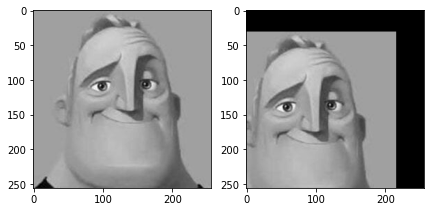

In [28]:
"""
Syntax dibawah merupakan pemanggilan function translation guna mentranslasikan sebuah citra
dengan masukan yaitu grayImage, trans, sumbu x = -40 dan sumbu y = 30
"""
translation (grayImage, trans, -40, 30)

# ROTASI

In [8]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaiut function rotate
yang dimana merupakan function yang digunakan untuk memproses pemutaran sebuah citra
yang dimasukkan kedalam function ini
"""
def rotate (image, degree):

    """
    Syntax dibawah merupakan inisialisasi dari variabel rotated, 
    degree, midRows dan midCols, yang mana digunakan untuk menyimpan 
    hasil pemutaran citra, derajat pemutaran citra (dalam radian) 
    dan titik tengah citra
    """
    rotated = np.zeros(image.shape)
    degree = np.deg2rad(degree)
    midRows = int((rotated.shape[0]-1)/2)
    midCols = int((rotated.shape[1]-1)/2)

    """
    Syntax dibawah merupakan perulangan for yang digunakan 
    untuk iterasi dari pixel 0,0pada citra sampai index 
    terakhir dari citra
    """
    for rows in range(rotated.shape[0]):
        for cols in range(rotated.shape[1]):

            """
            Syntax dibawah merupakan inisialisasi variabel x dan y, yang mana
            berisi nilai hasil perputaran dari citra yang ada dengan derajat
            perputaran tertentu menggunakan rumus rotasi pada titik asal
            (m, n) lalu nilainya ditambah dengan nilai titik tengah citra dan 
            dibuat dilakukan pembulatan keatas dengan menjadikannya bertipe data
            int
            """
            y = (rows-midCols)*np.cos(degree) + (cols-midRows)*np.sin(degree)
            x = -(rows-midCols)*np.sin(degree) + (cols-midRows)*np.cos(degree)

            y = int(y + midCols)
            x = int(x + midRows)

            """
            Syntax dibawah merupakan kondisi untuk mengecek apakah nilai dari perputaran keluar
            dari batas ukuran citra, agar citra bisa terlihat hasil perubahan perputarannya
            """
            if (x >= 0 and y >= 0 and x < image.shape[0] and y < image.shape[1]):
                rotated[rows][cols] = image[y][x]

    """
    Syntax dibawah merupakan pemanggilan function display guna menampilkan
    hasil citra asli dan perubahannya
    """
    display (grayImage, rotated)

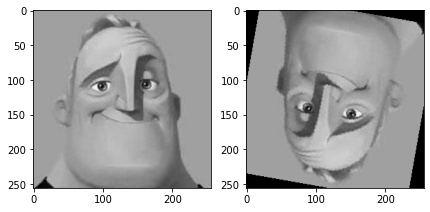

In [9]:
rotate(grayImage, 170)

# PENCERMINAN TERHADAP SUMBU X

In [10]:
"""
Syntax dibawah merupakan inisialisasi dari variabel mirror, 
yang mana digunakan untuk menyimpan hasil dari 
pencerminan pada citra nantinya
"""
mirror = np.zeros([panjang, lebar])

"""
Syntax dibawah merupakan pendefinisian sebuah function yaiut function flipX
yang dimana merupakan function yang digunakan untuk memproses pencerminan sebuah citra
yang dimasukkan kedalam function ini
"""
def flipX (image, result, y):

    """
    Syntax dibawah merupakan perulangan for yang digunakan 
    untuk iterasi dari pixel 0,0pada citra sampai index 
    terakhir dari citra
    """
    for rows in range (image.shape[0]):
        for cols in range(image.shape[1]):
            result[rows][cols] = image[y-1-rows][cols]

    """
    Syntax dibawah merupakan pemanggilan function display guna menampilkan
    hasil citra asli dan perubahannya
    """
    display (grayImage, result)

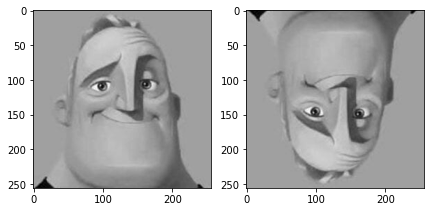

In [11]:
"""
Syntax dibawah merupakan pemanggilan dari function flipX
guna melakukan pecerminan citra terhadap sumbu x
"""
flipX (grayImage, mirror, lebar)

# PENCERMINAN TERHADAP SUMBU Y

In [12]:
"""
Syntax dibawah merupakan inisialisasi dari variabel mirror, 
yang mana digunakan untuk menyimpan hasil dari 
pencerminan pada citra nantinya
"""
mirror = np.zeros([panjang, lebar])

"""
Syntax dibawah merupakan pendefinisian sebuah function yaiut function flipY
yang dimana merupakan function yang digunakan untuk memproses pencerminan sebuah citra
yang dimasukkan kedalam function ini
"""
def flipY (image, result, x):
    
    """
    Syntax dibawah merupakan perulangan for yang digunakan 
    untuk iterasi dari pixel 0,0pada citra sampai index 
    terakhir dari citra
    """
    for rows in range (image.shape[0]):
        for cols in range(image.shape[1]):
            result[rows][cols] = image[rows][x-1-cols]

    """
    Syntax dibawah merupakan pemanggilan function display guna menampilkan
    hasil citra asli dan perubahannya
    """
    display (grayImage, result)

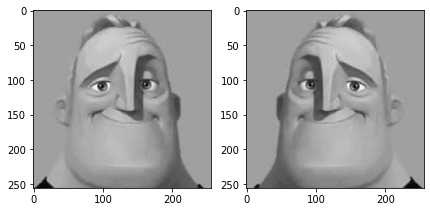

In [13]:
"""
Syntax dibawah merupakan pemanggilan dari function flipY
guna melakukan pecerminan citra terhadap sumbu y
"""
flipY (grayImage, mirror, panjang)

# DILATASI

In [14]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaiut function dilated
yang dimana merupakan function yang digunakan untuk memproses dilatasi sebuah citra
yang dimasukkan kedalam function ini
"""
def dilated (image, scalar):

    """
    Syntax dibawah merupakan inisialisasi dari variabel panjangNew dan lebarNew,
    yang mana merupakan nilai untuk panjang dan lebar baru ketika citra sudah diperbesar
    atau di dilatasi
    """
    panjangNew = math.floor(panjang * scalar)
    lebarNew = math.floor(lebar * scalar)

    """
    Syntax dibawah merupakan inisialisasi dari variabel result,
    yang mana digunakan untuk menyimpan hasil dari dilatasi 
    pada citra nantinya
    """
    result = np.zeros([panjangNew, lebarNew])

    """
    Syntax dibawah merupakan perulangan for yang digunakan 
    untuk iterasi dari pixel 0,0 pada panjang dan lebar baru
    sampai index terakhir dari panjang dan lebar baru
    """
    for rows in range (panjangNew):
        for cols in range (lebarNew):
            xBefore = int(panjang * rows / panjangNew)
            yBefore = int(lebar * cols / lebarNew)
            result[rows][cols] = image[xBefore][yBefore]

    """
    Syntax dibawah merupakan pemanggilan function display guna menampilkan
    hasil citra asli dan perubahannya
    """
    display (grayImage, result)

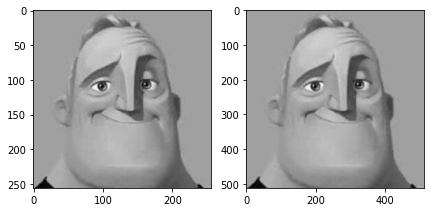

In [15]:
"""
Syntax dibawah merupakan pemanggilan dari function
dilated guna melakukan dilatasi dari citra yang ada
"""
dilated (grayImage, 2)

# NEGATIF

In [16]:
"""
Syntax dibawah merupakan inisialisasi dari variabel neg,
yang mana digunakan untuk menyimpan hasil dari pen-negatifan
pada citra nantinya
"""
neg = np.zeros([panjang, lebar])

"""
Syntax dibawah merupakan pendefinisian sebuah function yaiut function negative
yang dimana merupakan function yang digunakan untuk memproses penegatifan sebuah citra
yang dimasukkan kedalam function ini
"""
def negative (image, result):

    """
    Syntax dibawah merupakan perulangan for yang digunakan 
    untuk iterasi dari pixel 0,0pada citra sampai index 
    terakhir dari citra
    """
    for rows in range (image.shape[0]):
        for cols in range (image.shape[1]):
            result [rows][cols] = 255 - image [rows][cols]
    
    """
    Syntax dibawah merupakan pengembalian hasil penegatifan dari
    citra setelah pemanggilan dari function ini
    """
    return result

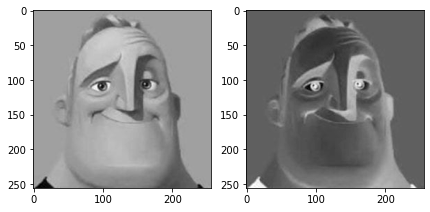

In [17]:
"""
Syntax dibawah merupakan pemanggilan function  negative yang hasil
pengembalian oleh function nya disimpan pada variabel negativeRes
"""
negativeRes = negative (grayImage, neg)

"""
Syntax dibawah merupakan pemanggilan function display guna menampilkan
hasil citra asli dan perubahannya
"""
display (grayImage, negativeRes)

# PERBANDINGAN HISTOGRAM

In [18]:
"""
Syntax dibawah merupakan inisialisasi dari variabel grayResultOri
dan grayResultNegative, yang mana digunakan untuk
menyimpan data nilai tingkat keabuan dari citra original
dan citra hasil penegatifan nya
"""
grayResultOri = np.zeros(256).astype(int)
grayResultNegative = np.zeros(256).astype(int)

"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function histogram
yang dimana merupakan function yang digunakan untuk memproses pencarian persebaran
nilai tingkat keabuan sebuah citra yang dimasukkan kedalam function ini
"""
def histogram (image, grayResult):

    """
    Syntax dibawah merupakan perulangan for yang digunakan 
    untuk iterasi dari pixel 0,0pada citra sampai index 
    terakhir dari citra
    """
    for rows in range(image.shape[0]):
        for cols in range(image.shape[1]):
            grayValue = image[rows][cols]
            grayResult[grayValue] += 1

    """
    Syntax dibawah merupakan pengembalian hasil pencarian 
    persebaran nilai tingkat keabuan sebuah citra
    setelah pemanggilan dari function ini
    """
    return grayResult

In [19]:
"""
Syntax dibawah merupakan penginisialisasian dari variabel histogramOri dan 
histogramNegative, yang mana diisi dengan nilai balikan dari function yang dipanggil
didalamnya yaitu function histogram
"""
histogramOri = histogram (grayImage, grayResultOri)
histogramNegative = histogram (grayImage, grayResultNegative)

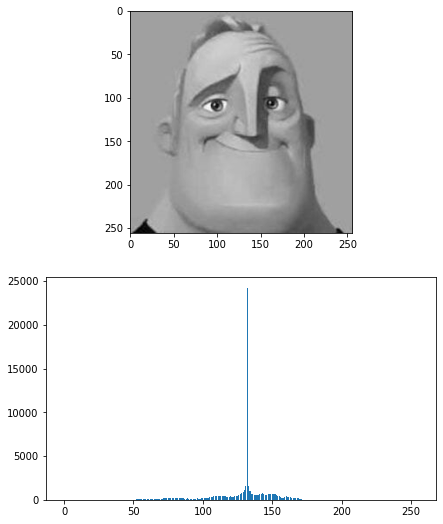

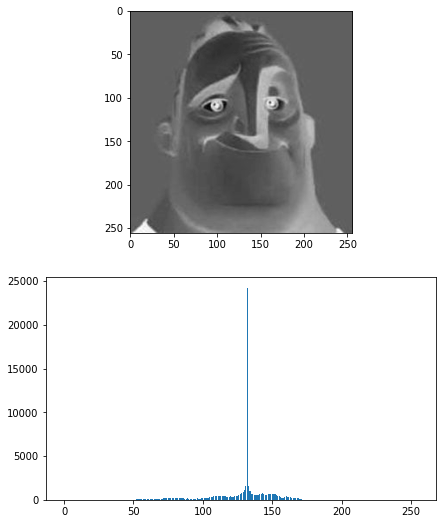

In [20]:
"""
Syntax dibawah merupakan pemanggilan function displaywithHistogram
guna menampilkan hasil citra asli dan histogramnya
"""
displaywithHistogram (grayImage, histogramOri)
displaywithHistogram (negativeRes, histogramNegative)